Data = https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

TEAM MEMBERS - Nishant Sharma(B20EE039) , Neielotpal Rao(B20EE038) and 
Shashwat Singh(B20CS066)

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score , classification_report, f1_score, recall_score, precision_score

data = pd.read_csv("/content/heart (1).csv")

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


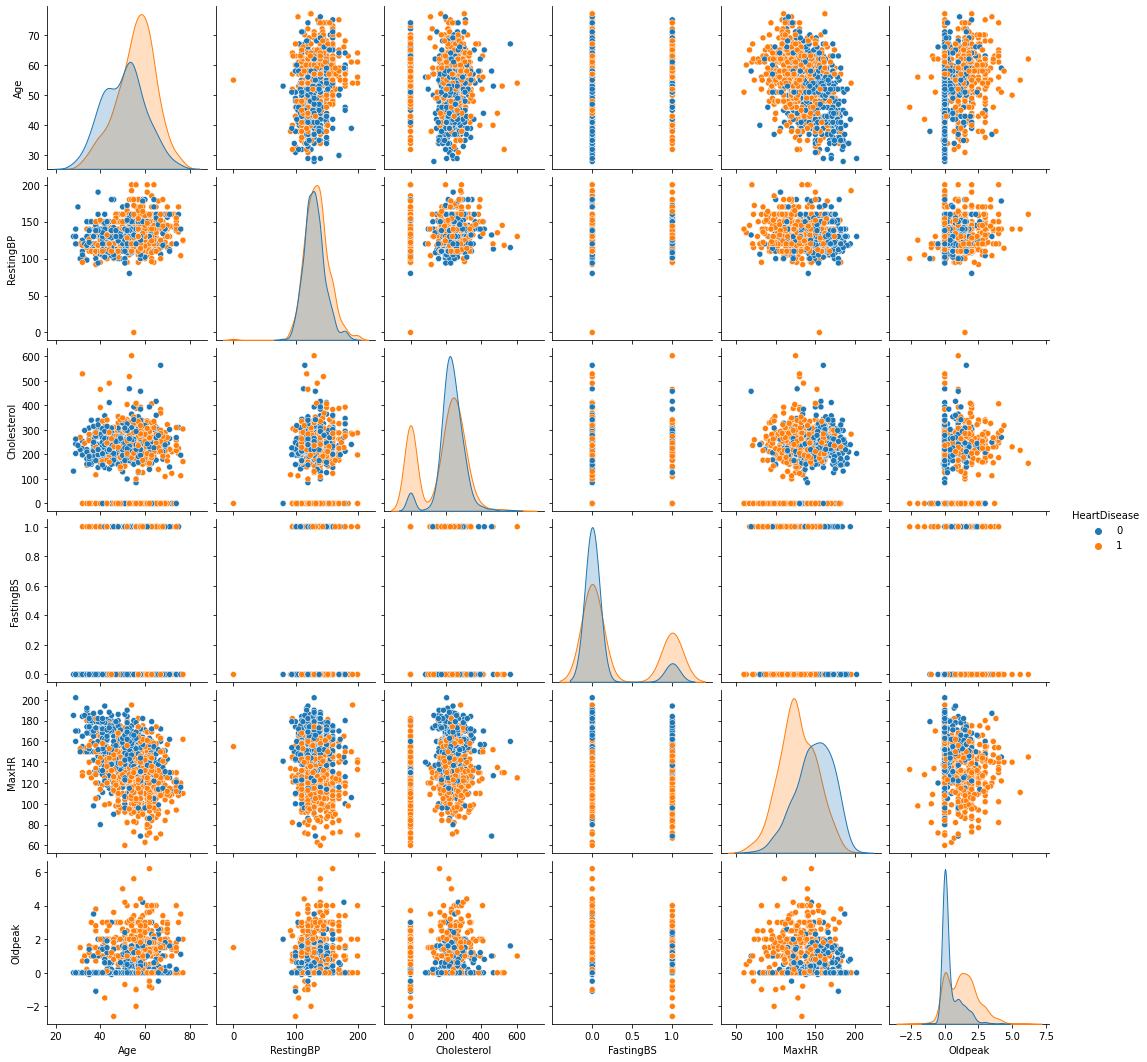

In [ ]:
sns.pairplot(data,hue='HeartDisease')

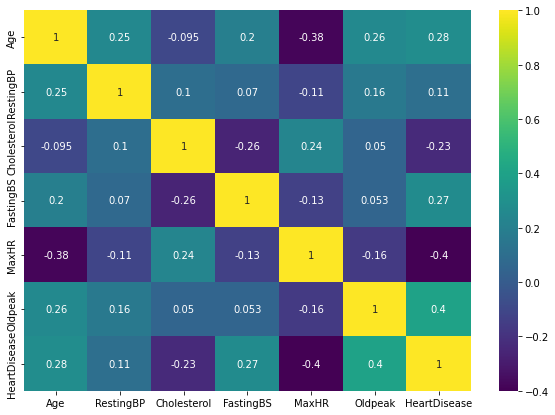

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
plt.show()

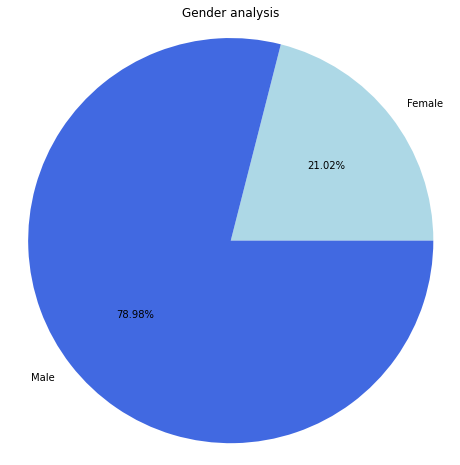

In [ ]:
plt.figure(figsize=(8, 8))
labels=['Female', 'Male']
plt.pie(data['Sex'].value_counts().sort_values(),autopct='%1.2f%%',labels=labels,
        colors=['lightblue','royalblue'])
plt.title('Gender analysis')
plt.axis('equal')
plt.show()

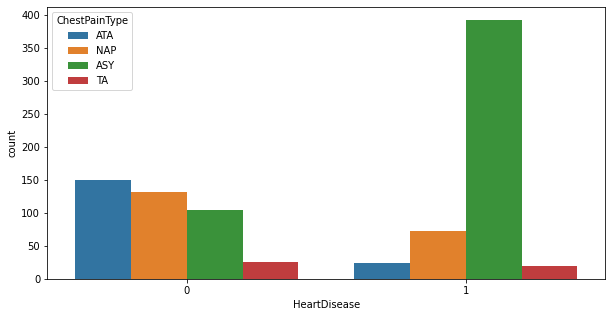

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['HeartDisease'],hue=data['ChestPainType'])
plt.xticks(np.arange(2), ['0', '1']) 
plt.show()

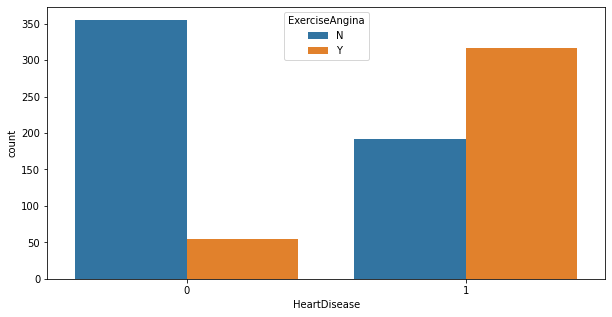

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.HeartDisease,hue=data.ExerciseAngina)
plt.xticks(np.arange(2), ['0', '1']) 
plt.show()

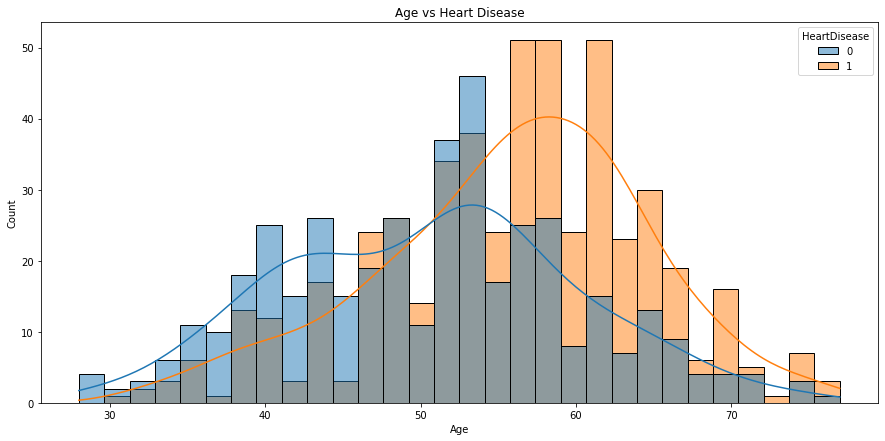

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Age vs Heart Disease')

sns.histplot(data=data, x='Age', hue='HeartDisease', bins=30, kde=True);

In [ ]:
def encoder(new,a):

  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  for i in a:
    new[i] = le.fit_transform(new[i])

  return

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data['FastingBS'].value_counts()

numpy.int64

In [ ]:
#
data_encoded = pd.get_dummies(data)

data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
X = data_encoded.drop(['HeartDisease'], axis=1)
y = data_encoded['HeartDisease']

In [ ]:
scaler  =  StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X , y, test_size =0.3 , random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X_scaled , y, test_size =0.3 , random_state=42)

In [ ]:
def model(model, X, y, X_, y_):
  model.fit(X,y)
  y_p = model.predict(X_)
  print(model, 'Accuracy :',accuracy_score(y_,y_p),'\n','\t\t\t','f1_score :',f1_score(y_,y_p),'\n','\t\t\t','recall_score :',recall_score(y_,y_p),'\n','\t\t\t','precision_score :',precision_score(y_,y_p))
  return

DecisionTreeClassifier() Accuracy : 0.7463768115942029 
 			 f1_score : 0.7666666666666666 
 			 recall_score : 0.7012195121951219 
 			 precision_score : 0.8455882352941176


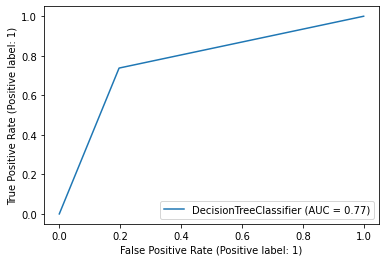

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

dt = DecisionTreeClassifier().fit(X_train, y_train)
ROC_DT = RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.show()

In [ ]:
from sklearn.svm import SVC
model(SVC(kernel='rbf',C=1, gamma = 0.001), X_train, y_train, X_test, y_test)

SVC() Accuracy : 0.894927536231884 
 			 f1_score : 0.9113149847094801 
 			 recall_score : 0.9085365853658537 
 			 precision_score : 0.9141104294478528


XGBClassifier() Accuracy : 0.8695652173913043 
 			 f1_score : 0.8853503184713376 
 			 recall_score : 0.8475609756097561 
 			 precision_score : 0.9266666666666666


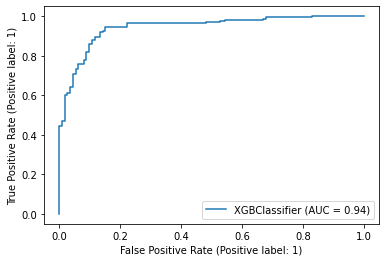

In [ ]:
from xgboost import XGBClassifier
model(XGBClassifier(), X_train, y_train, X_test, y_test)

xgb = XGBClassifier().fit(X_train, y_train)
ROC_XGB = RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
model(LGBMClassifier(), X_train, y_train, X_test, y_test)


LGBMClassifier() Accuracy : 0.8623188405797102 
 			 f1_score : 0.8812500000000001 
 			 recall_score : 0.8597560975609756 
 			 precision_score : 0.9038461538461539


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y_pred_rfc = model(RandomForestClassifier(), X_train, y_train, X_test, y_test)

RandomForestClassifier() Accuracy : 0.8840579710144928 
 			 f1_score : 0.9012345679012346 
 			 recall_score : 0.8902439024390244 
 			 precision_score : 0.9125


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model(KNeighborsClassifier(n_neighbors=30),X_train, y_train, X_test, y_test)

KNeighborsClassifier(n_neighbors=30) Accuracy : 0.8804347826086957 
 			 f1_score : 0.897196261682243 
 			 recall_score : 0.8780487804878049 
 			 precision_score : 0.9171974522292994


In [ ]:
#Deep neural Network
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

NN_model = Sequential()


NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               2688      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 167,553
Trainable params: 167,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
NN_y_pred = NN_model.predict(X_test)


In [ ]:
Y_nn = []

for i in range(len(NN_y_pred)):
  if (NN_y_pred[i]>0.5):
    Y_nn.append(1)
  else:
    Y_nn.append(0)


In [ ]:
print(NN_model, 'Accuracy :',accuracy_score(y_test,Y_nn),'\n','\t\t\t','f1_score :',f1_score(y_test,Y_nn),'\n','\t\t\t','recall_score :',recall_score(y_test,Y_nn),'\n','\t\t\t','precision_score :',precision_score(y_test,Y_nn))

<keras.engine.sequential.Sequential object at 0x7fb37e17cbd0> Accuracy : 0.894927536231884 
 			 f1_score : 0.9118541033434651 
 			 recall_score : 0.9146341463414634 
 			 precision_score : 0.9090909090909091


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=43,init='random',
     max_iter=500)

y_km = kmeans.fit_predict(X_train)

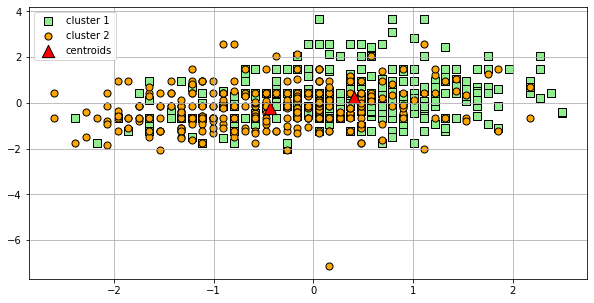

In [ ]:
plt.figure(figsize=(10,5))
data = np.array(X_train)
plt.scatter(
    data[y_km == 0, 0], data[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data[y_km == 1, 0], data[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=150, marker='^',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

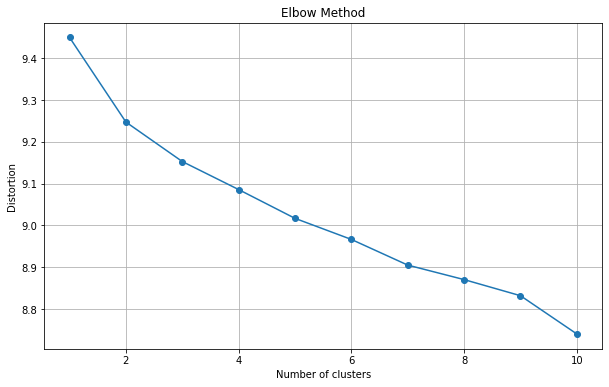

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_train)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), np.log(distortions), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid()
plt.show()

MODEL COMPARISON

In [ ]:
#Using Cross Validation Scores
def cross_val(model,X,y) :
  from sklearn.model_selection import cross_val_score

  scores = cross_val_score(model, X, y, cv=5)
  plt.figure(figsize=(10,6))
  plt.plot(range(1,6), scores)
  plt.title(model)
  plt.xlabel('nth interation')
  plt.ylabel('score')
  plt.ylim(0.75, 0.95)
  plt.grid()
  plt.show()
  print(model,'Cross Validation Score',scores)
  return

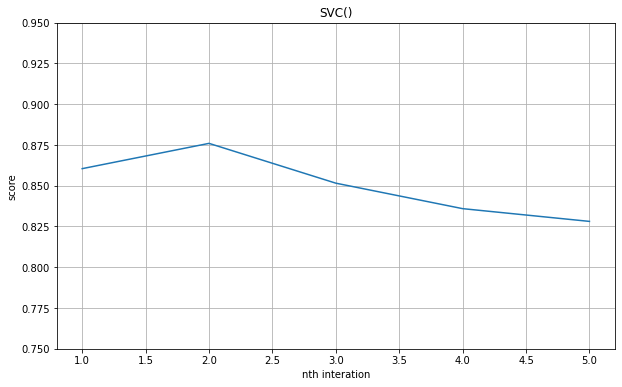

SVC() Cross Validation Score [0.86046512 0.87596899 0.8515625  0.8359375  0.828125  ]




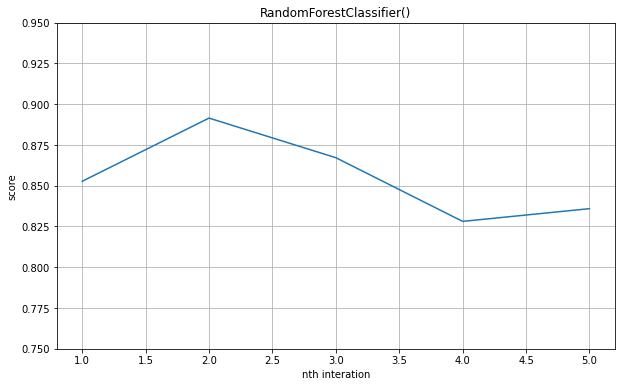

RandomForestClassifier() Cross Validation Score [0.85271318 0.89147287 0.8671875  0.828125   0.8359375 ]




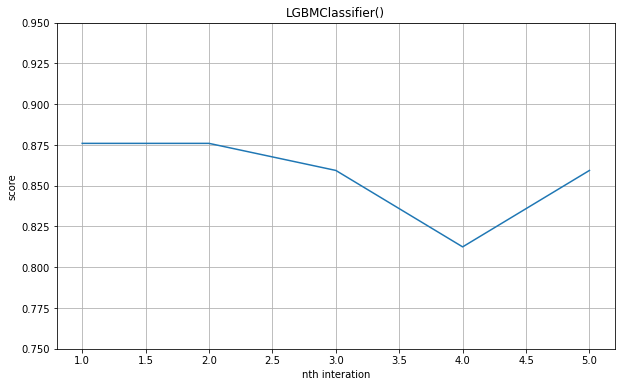

LGBMClassifier() Cross Validation Score [0.87596899 0.87596899 0.859375   0.8125     0.859375  ]




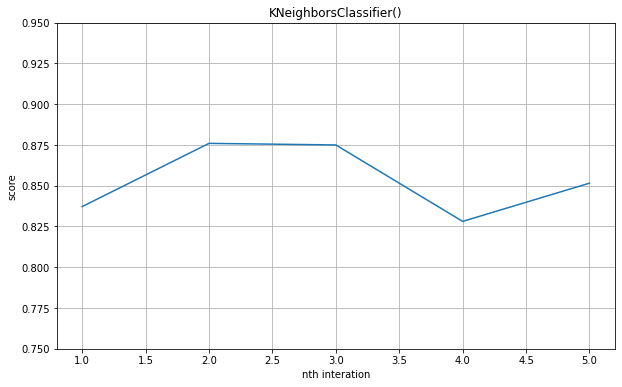

KNeighborsClassifier() Cross Validation Score [0.8372093  0.87596899 0.875      0.828125   0.8515625 ]




In [ ]:
M = (SVC(), RandomForestClassifier(), LGBMClassifier(), KNeighborsClassifier())
for i in M:
  cross_val(i,X_train,y_train);
  print('\n')

Now Tune the Hyperparameter of best models using Grid aur RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,scoring='f1', n_iter = 20, cv = 5, verbose=-1, random_state=42)

rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='f1', verbose=-1)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 700}

In [ ]:
model(RandomForestClassifier(max_depth = 20,
                             max_features = 'auto',
                             min_samples_leaf = 10,
                             min_samples_split = 5,
                             n_estimators = 700), X_train, y_train, X_test, y_test)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=700) Accuracy : 0.8768115942028986 
 			 f1_score : 0.8957055214723927 
 			 recall_score : 0.8902439024390244 
 			 precision_score : 0.9012345679012346


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters =  {'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf'],
               'gamma' : [0.0001,0.001,0.01,0.1,1]}
 

svc_s = GridSearchCV(estimator = SVC(), param_grid = parameters ,scoring='f1', cv = 7, verbose=-1)

svc_s.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=-1)

In [ ]:
svc_s.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
model(SVC(kernel='rbf',C=10, gamma = 0.01), X_train, y_train, X_test, y_test)

SVC(C=10, gamma=0.01) Accuracy : 0.8731884057971014 
 			 f1_score : 0.8909657320872274 
 			 recall_score : 0.8719512195121951 
 			 precision_score : 0.910828025477707


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,10,15,20,30],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'p' : [1,2]}



knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2,grid_params, cv=5)


best_model = clf.fit(X_train,y_train)


best_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}

In [ ]:
model(KNeighborsClassifier(metric= 'minkowski',n_neighbors= 30, p= 1,weights= 'distance'), X_train, y_train, X_test, y_test)


KNeighborsClassifier(n_neighbors=30, p=1, weights='distance') Accuracy : 0.8840579710144928 
 			 f1_score : 0.9 
 			 recall_score : 0.8780487804878049 
 			 precision_score : 0.9230769230769231


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_lgm = {
   'n_estimators': [100,500,1000,1500] , 
    'learning_rate': [0.001,0.01,0.1,0.5,1],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100,500]
}

Random_search = RandomizedSearchCV(estimator = LGBMClassifier(), param_distributions = param_grid_lgm,scoring='f1', n_iter = 20, cv = 5,verbose=-1)

Random_search.fit(X_train,y_train)

Random_search.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 50,
 'n_estimators': 500}

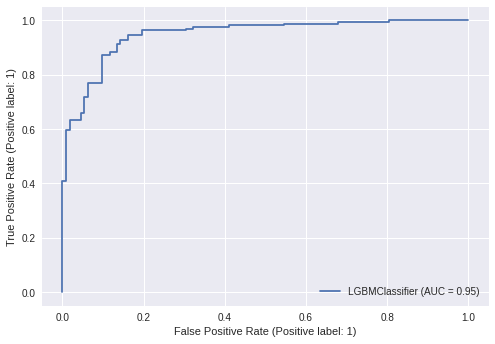

In [ ]:
from lightgbm import LGBMClassifier

lgm = LGBMClassifier(colsample_bytree= 0.6,learning_rate= 0.01,max_depth= 50,n_estimators= 500).fit(X_train, y_train)
ROC_LGM = RocCurveDisplay.from_estimator(lgm, X_test, y_test)
plt.show()

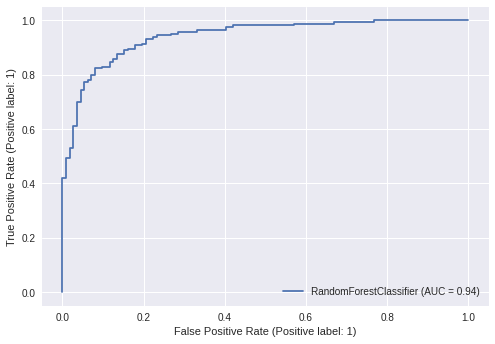

In [ ]:
from sklearn.metrics import RocCurveDisplay
 
md = RandomForestClassifier(max_depth= 20,max_features= 'auto',min_samples_leaf= 10,min_samples_split= 5,n_estimators= 700).fit(X_train, y_train)

ROC_RF = RocCurveDisplay.from_estimator(md, X_test, y_test)
plt.show()

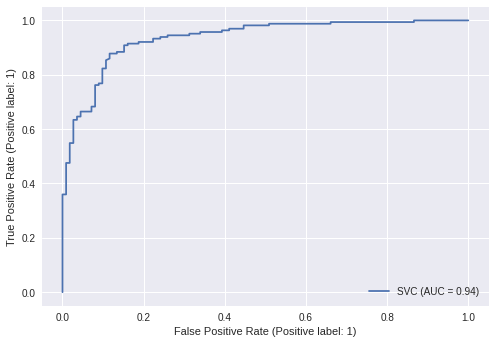

In [ ]:


mvc = SVC(kernel='rbf',C=1, gamma = 0.001,probability=True).fit(X_train, y_train)

ROC_SVC = RocCurveDisplay.from_estimator(mvc, X_test, y_test)
plt.show()

In [ ]:
model(KNeighborsClassifier(n_neighbors = 30, weights = 'distance',algorithm = 'brute',metric = 'minkowski'),X_train,y_train,X_test,y_test)

KNeighborsClassifier(algorithm='brute', n_neighbors=30, weights='distance') Accuracy : 0.8768115942028986 
 			 f1_score : 0.8944099378881988 
 			 recall_score : 0.8780487804878049 
 			 precision_score : 0.9113924050632911


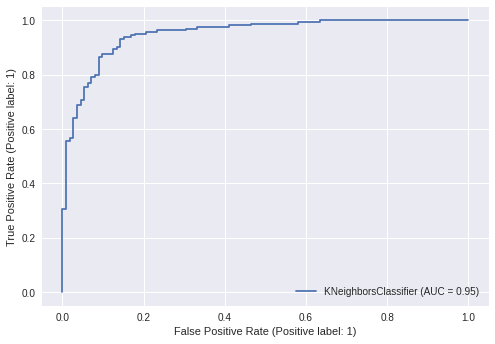

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance',algorithm = 'brute',metric = 'minkowski').fit(X_train, y_train)

ROC_KNN = RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.show()

ROC CURVE COMPARISON

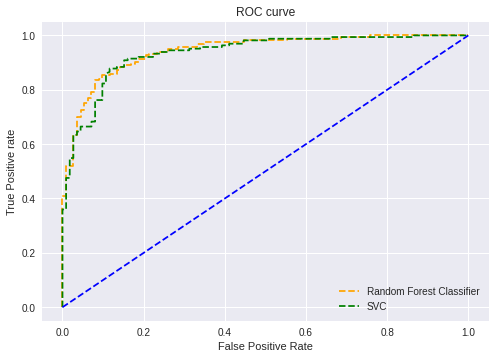

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

pred_prob1 = md.predict_proba(X_test)
pred_prob2 = mvc.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

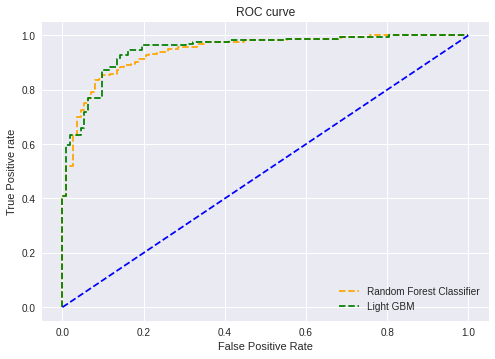

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

pred_prob1 = md.predict_proba(X_test)
pred_prob2 = lgm.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Light GBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

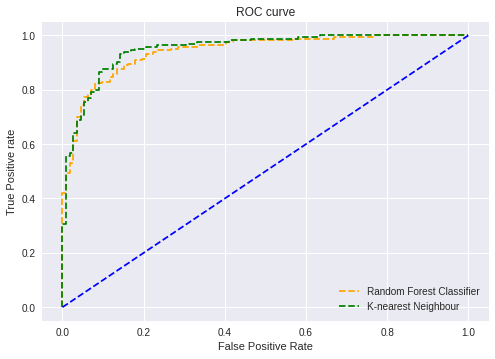

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

pred_prob1 = md.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='K-nearest Neighbour')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

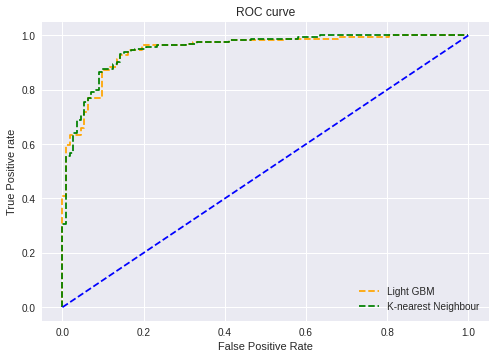

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

pred_prob1 = lgm.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Light GBM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='K-nearest Neighbour')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#As we can obeserve from these plots that KNN and Random forest are the best algorithms for our task
#################

import pickle
KNN = KNeighborsClassifier(metric= 'minkowski',n_neighbors= 30, p= 1,weights= 'distance')
KNN.fit(X,y)


KNeighborsClassifier(n_neighbors=30, p=1, weights='distance')

In [ ]:
#Finally Saving the model for Future USe

model_filename = 'finalized_model_KNN.sav'
saved_model = pickle.dump(KNN, open(model_filename,'wb'))

#Now we can use it for implementing a WebApp or any medical devices